<>:94: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:96: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:127: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:129: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:94: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:96: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:127: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:129: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/gb/6y78pck94939p6dhylx6kb8h0000gp/T/ipykernel_13269/660136672.py:94: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if hole['type'] is 'slit':
/var/folders/gb/6y78pck94939p6dhylx6kb8h0000gp/T/ipykernel_13269/660136672.py:96: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if hole['type'] is 'circular':
/var/folders/gb/6y78pck94939p6dhylx6kb8h0000gp/T/ipykernel_13269/660136672.py:127: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if hole['type'] is 'slit

Adding phasors


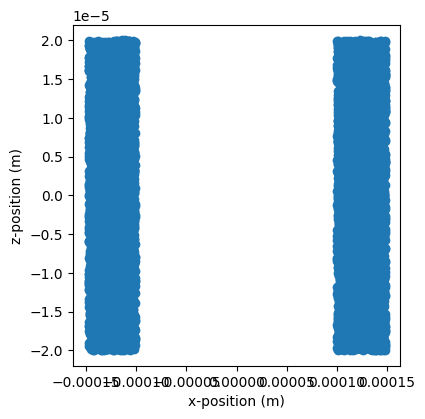

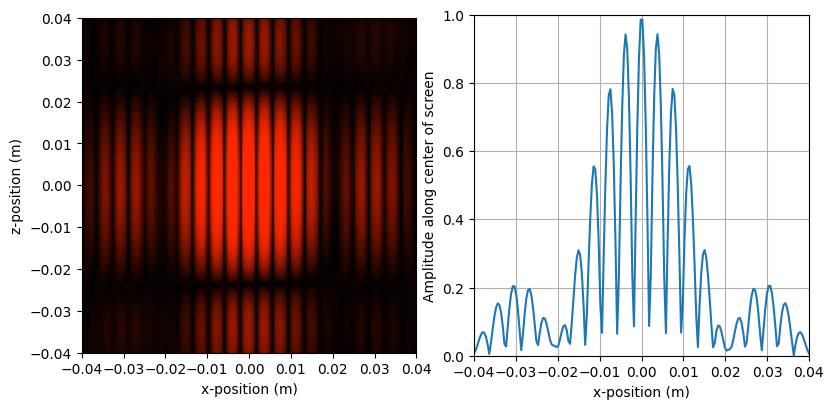

In [3]:
#@title **Simulation Parameters**

import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation
from functools import partial
from IPython.display import HTML, display

# Magic code from StackExchange that makes mpl animations go in CoLab
from matplotlib import rc
rc('animation', html='jshtml')



#@markdown **Screen Parameters**

#@markdown Screen width (m):
screen_width = 0.0256 #@param {type: "number", min: 0.0001}

screen_width = 0.08

#@markdown Distance from mask (m):
screen_y = 1.5 #@param {type: "number", min: 0.0001}

#@markdown Distance from mask to laser (m):
y_laser = -0.08 #@param {type: "number", max: 0}

#@markdown **Mask Parameters**

#@markdown Number of slits:
N = 15 #@param {type: "number", min: 1}
#@markdown Slit width (mm):
a = 0.04 #@param {type: "number", min: 0.0001}
a *= 1E-3
#@markdown Slit spacing (N>1) (center-to-center mm):
d = 0.12 #@param {type: "number", min: 0.0001}
d *= 1E-3

#@markdown **Laser Parameters**

#@markdown Wavelength (nm):
wavelength = 635 #@param {type: "number", min: 405, max: 650}
wavelength *= 1E-9



#@markdown **Image**

#@markdown Enhance dim light:
enhance = True #@param {type: "boolean"}
#@markdown High resolution:
hi_res = False #@param {type: "boolean"}


hi_res = True

#@markdown Only show intensity along z=0 line on screen
no_screen = False #@param {type: "boolean"}


num_points = 1000
if hi_res:
  num_points = 10000


# This makes the loading bar go
def progress(value, max=100):
  return HTML("""
      <progress
          value='{value}'
          max='{max}',
          style='width: 100%'
      >
          {value}
      </progress>
  """.format(value=value, max=max))


class mask:
  def __init__(self):
    self.holes = []
    self.points = []


  def add_hole(self, hole):
    self.holes.append(hole)


  def area_holes(self):
    area = 0
    for hole in self.holes:
      if hole['type'] is 'slit':
        area += hole['w']*hole['h']
      if hole['type'] is 'circular':
        area += math.pi*hole['radius']**2
    return area


  def process_slit(self, hole, area_holes, num_points):
    r = hole['r']
    w = hole['w']
    h = hole['h']
    num_points = int(num_points * hole['w']*hole['h'] / area_holes)
    for i in range(num_points):
      this_x = np.random.uniform(-w/2, w/2)
      this_z = np.random.uniform(-h/2, h/2)
      self.points.append((r[0] + this_x, r[1], r[2] + this_z))


  def process_circular(self, hole, area_holes, num_points):
    r = hole['r']
    radius = hole['radius']
    num_points = int(num_points * math.pi * radius**2 / area_holes)
    for i in range(num_points):
      this_r = np.sqrt(np.random.uniform(0, radius**2))
      this_theta = np.random.uniform(0, 2*math.pi)
      this_x = this_r*np.cos(this_theta)
      this_z = this_r*np.sin(this_theta)
      self.points.append((r[0] + this_x, r[1], r[2] + this_z))


  def plot_points(self, num_points):
    area_holes = self.area_holes()
    for hole in self.holes:
      if hole['type'] is 'slit':
        self.process_slit(hole, area_holes, num_points)
      if hole['type'] is 'circular':
        self.process_circular(hole, area_holes, num_points)
    x = [i[0] for i in self.points]
    z = [i[2] for i in self.points]

    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    fig.tight_layout()
    ax.set_ylabel("z-position (m)")
    z_max = np.max(z)
    ax.set_ylim(-z_max*1.1, z_max*1.1)
    x_max = np.max(x)
    ax.set_xlabel("x-position (m)")
    ax.set_xlim(-x_max*1.1, x_max*1.1)
    ax.scatter(x, z)

    return self.points

# Create mask
mask = mask()


###################################################################
######################### Code to look at #########################
###################################################################


###################################################################
### Section 1
# Many slits
# left_slit_x = -(N-1)/2*d
# for slit in range(N):
#   slit_x = left_slit_x + slit*d
#   #a_new = np.random.uniform(a/2, a)
#   hole = {'type':'slit', 'r':[slit_x, 0, 0], 'w':a, 'h':2E-3}
#   mask.add_hole(hole)

# hole = {'type':'slit', 'r':[1E-2, 0, 0], 'w':1E-3, 'h':a}
# hole2 = {'type':'slit', 'r':[-1E-2, 0, 0], 'w':1E-3, 'h':a}


hole = {'type':'slit', 'r':[0.1245E-3, 0, 0], 'w':0.048E-3, 'h':a}
hole2 = {'type':'slit', 'r':[-0.1245E-3, 0, 0], 'w':0.046E-3, 'h':a}

mask.add_hole(hole)
mask.add_hole(hole2)

# for i in range(225):
#   this_x = np.random.uniform(-1.25E-3, 1.25E-3)
#   this_z = np.random.uniform(-1.25E-3, 1.25E-3)
#   hole = {'type':'circular', 'r':[this_x, 0, this_z], 'radius':0.03E-3}
#   mask.add_hole(hole)


# Gets random points sampled from within mask and plots them
r_sources = mask.plot_points(num_points)


###################################################################
### Section 2
def calc_distance(r1, r2):
  """
  Calculates distance between two points in 3D.
  """
  distance = np.sqrt((r1[0]-r2[0])**2 + (r1[1]-r2[1])**2 + (r1[2]-r2[2])**2)
  return distance


###################################################################
### Section 3
def calc_phase_source(r_source, wavelength):
  """
  Calculates phase at source in mask.
  """
  # Phase at laser changes by 2pi over an x distance of 0.1 mm
  phase_laser = 2*np.pi*r_source[0]/0.1E-3

  # Distance from laser to source in mask
  r_laser = [r_source[0], -0.1, r_source[2]]
  dist = calc_distance(r_laser, r_source)

  # Phase at source
  phase_source = phase_laser + 2*np.pi*dist/wavelength

  return phase_source


###################################################################
### Section 4
def calc_phasor(r_source, r_points, wavelength):
  """
  Calculates phasor at screen.
  """
  # Distance from point source to points on screen
  dist = calc_distance(r_source, r_points)

  # Phase at screen
  phase = 0
  #phase += calc_phase_source(r_source, wavelength)
  phase += 2*np.pi*dist/wavelength

  # Phasor components
  phasor_x = np.cos(phase)
  phasor_y = np.sin(phase)

  return phasor_x, phasor_y


###################################################################
### Section 5
def add_phasors(r_sources, r_points, wavelength):
  """
  Adds phasors from multiple points of light within mask
  """
  # Initalize total phasor to zero
  total_phasor_x = 0
  total_phasor_y = 0

  # Loop over all points in the mask
  for i, r_source in enumerate(r_sources):
    # Phasor x and y component at screen due to point source
    phasor_x, phasor_y = calc_phasor(r_source, r_points, wavelength)

    # Add phasor from this point to the total phasor
    total_phasor_x += phasor_x
    total_phasor_y += phasor_y

    #
    progbar.update(progress(i+1, len(r_sources)))

  total_phasor_x /= len(r_sources)
  total_phasor_y /= len(r_sources)

  return total_phasor_x, total_phasor_y


###################################################################
### Section 6
# Create points on screen to calculate phase at
if no_screen:
  x_range = np.linspace(-screen_width/2, screen_width/2, 10000)
  r_points = [x_range, screen_y, 0]
else:
  resolution = 100
  if hi_res:
    resolution = 200
  x_range = np.linspace(-screen_width/2, screen_width/2, resolution)
  z_range = np.linspace(-screen_width/2, screen_width/2, resolution)
  x_points, z_points = np.meshgrid(x_range, z_range)
  r_points = [x_points, screen_y, z_points]


# Calculate total phasor at points
# Init progress bar
progbar = display(progress(0, len(r_sources)), display_id=True)
print('Adding phasors')
phasor_x, phasor_y = add_phasors(r_sources, r_points, wavelength)
phasor_mag = np.sqrt(phasor_x**2 + phasor_y**2)


###################################################################
########################## Plotting code ##########################
###################################################################


def rotate_phasor(phasor_x, phasor_y, rotation):
  """
  Rotates a phasor
  """
  mag = np.sqrt(phasor_x**2+phasor_y**2)
  phase = np.arctan2(phasor_y, phasor_x)
  phase -= rotation

  phasor_x = mag*np.cos(phase)
  phasor_y = mag*np.sin(phase)

  return phasor_x, phasor_y


def create_colormap(wavelength):
  global enhance
  rgb = wavelength_to_rgb(wavelength)
  newcolors = []
  for i in range(256):
    intensity = i/256
    if enhance:
      intensity = 1 - math.pow(1-i/256, 4)
    newcolors.append(np.array(rgb)*intensity)
  return colors.ListedColormap(newcolors)


def wavelength_to_rgb(wavelength):
  rgb = [0.0, 0.0, 0.0]
  w = wavelength/1E-9
  if w < 380:
      rgb = [1,0,1]
  elif  w>= 380 and w < 440:
      rgb = [-(w - 440.) / (440. - 380.), 0.0, 1.0]
  elif w >= 440 and w < 490:
      rgb = [0.0, (w - 440.) / (490. - 440.), 1.0]
  elif w >= 490 and w < 510:
      rgb = [0.0, 1.0, -(w - 510.) / (510. - 490.)]
  elif w >= 510 and w < 580:
      rgb = [(w - 510.) / (580. - 510.), 1.0, 0.0]
  elif w >= 580 and w < 645:
      rgb = [1.0, -(w - 645.) / (645. - 580.), 0.0]
  elif w >= 645 and w <= 780:
      rgb = [1.0, 0.0, 0.0]
  return rgb


if no_screen:
  fig, ax2 = plt.subplots(1, 1, figsize=(8,4))
  ax2.set_ylabel("Amplitude along center of screen")
  ax2.set_ylim(0.0, 1.0)
  ax2.grid(True)
  ax2.set_xlabel("x-position (m)")
  ax2.set_xlim(-screen_width/2, screen_width/2)
  plot1D = ax2.plot(x_range, phasor_mag)[0]
else:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
  cmap = create_colormap(wavelength)
  fig.tight_layout()
  ax1.axis('square')
  ax1.set_ylabel("z-position (m)")
  ax1.set_ylim(-screen_width/2, screen_width/2)
  ax2.set_ylabel("Amplitude along center of screen")
  ax2.set_ylim(0.0, 1.0)
  ax1.set_xlabel("x-position (m)")
  ax1.set_xlim(-screen_width/2, screen_width/2)
  ax2.grid(True)
  ax2.set_xlabel("x-position (m)")
  ax2.set_xlim(-screen_width/2, screen_width/2)
  #phasor_mag = np.multiply(phasor_mag, phasor_mag>(4.604/np.sqrt(2*num_points)))
  plot2D = ax1.pcolor(x_points, z_points, phasor_mag, cmap=cmap, vmin=0, vmax=1)
  plot1D = ax2.plot(x_range, phasor_mag[int(resolution/2)])[0]

